In [2]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
lr.score(train_scaled, train_target), lr.score(test_scaled, test_target)

(0.7808350971714451, 0.7776923076923077)

In [9]:
lr.coef_, lr.intercept_

(array([[ 0.51270274,  1.6733911 , -0.68767781]]), array([1.81777902]))

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
dt.score(train_scaled, train_target), dt.score(test_scaled, test_target)

(0.996921300750433, 0.8592307692307692)

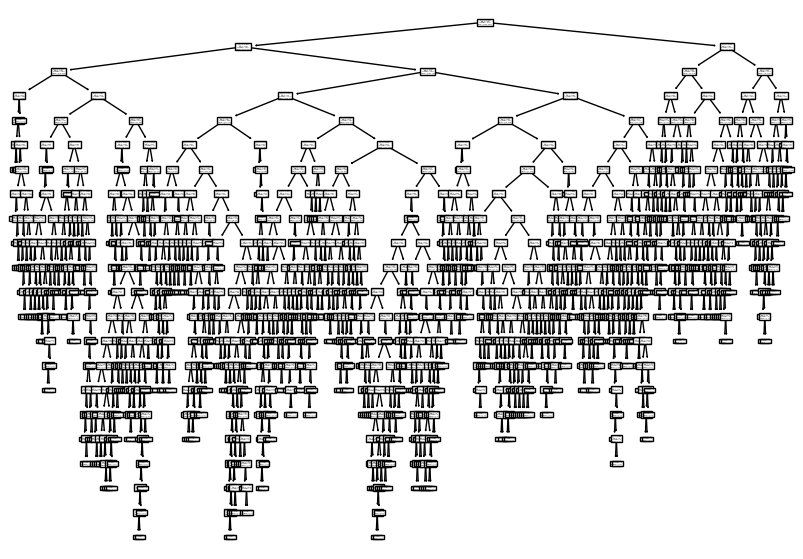

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

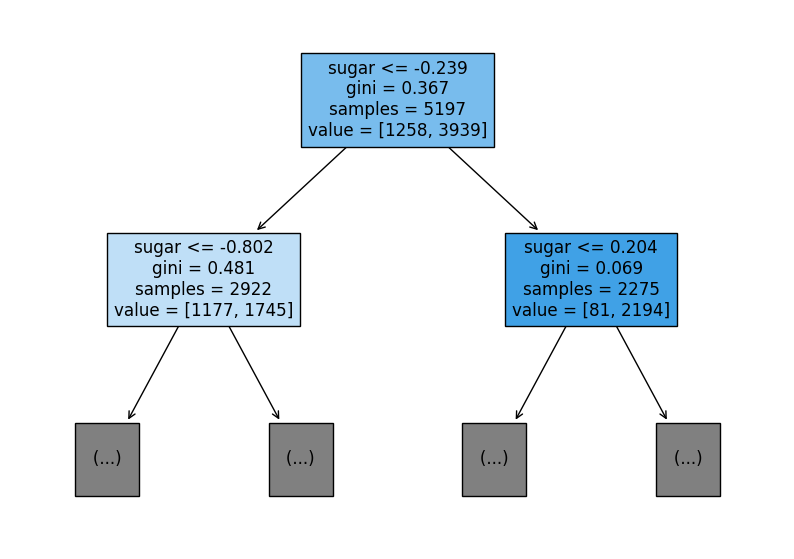

In [12]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [13]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
dt.score(train_scaled, train_target), dt.score(test_scaled, test_target)

(0.8454877814123533, 0.8415384615384616)

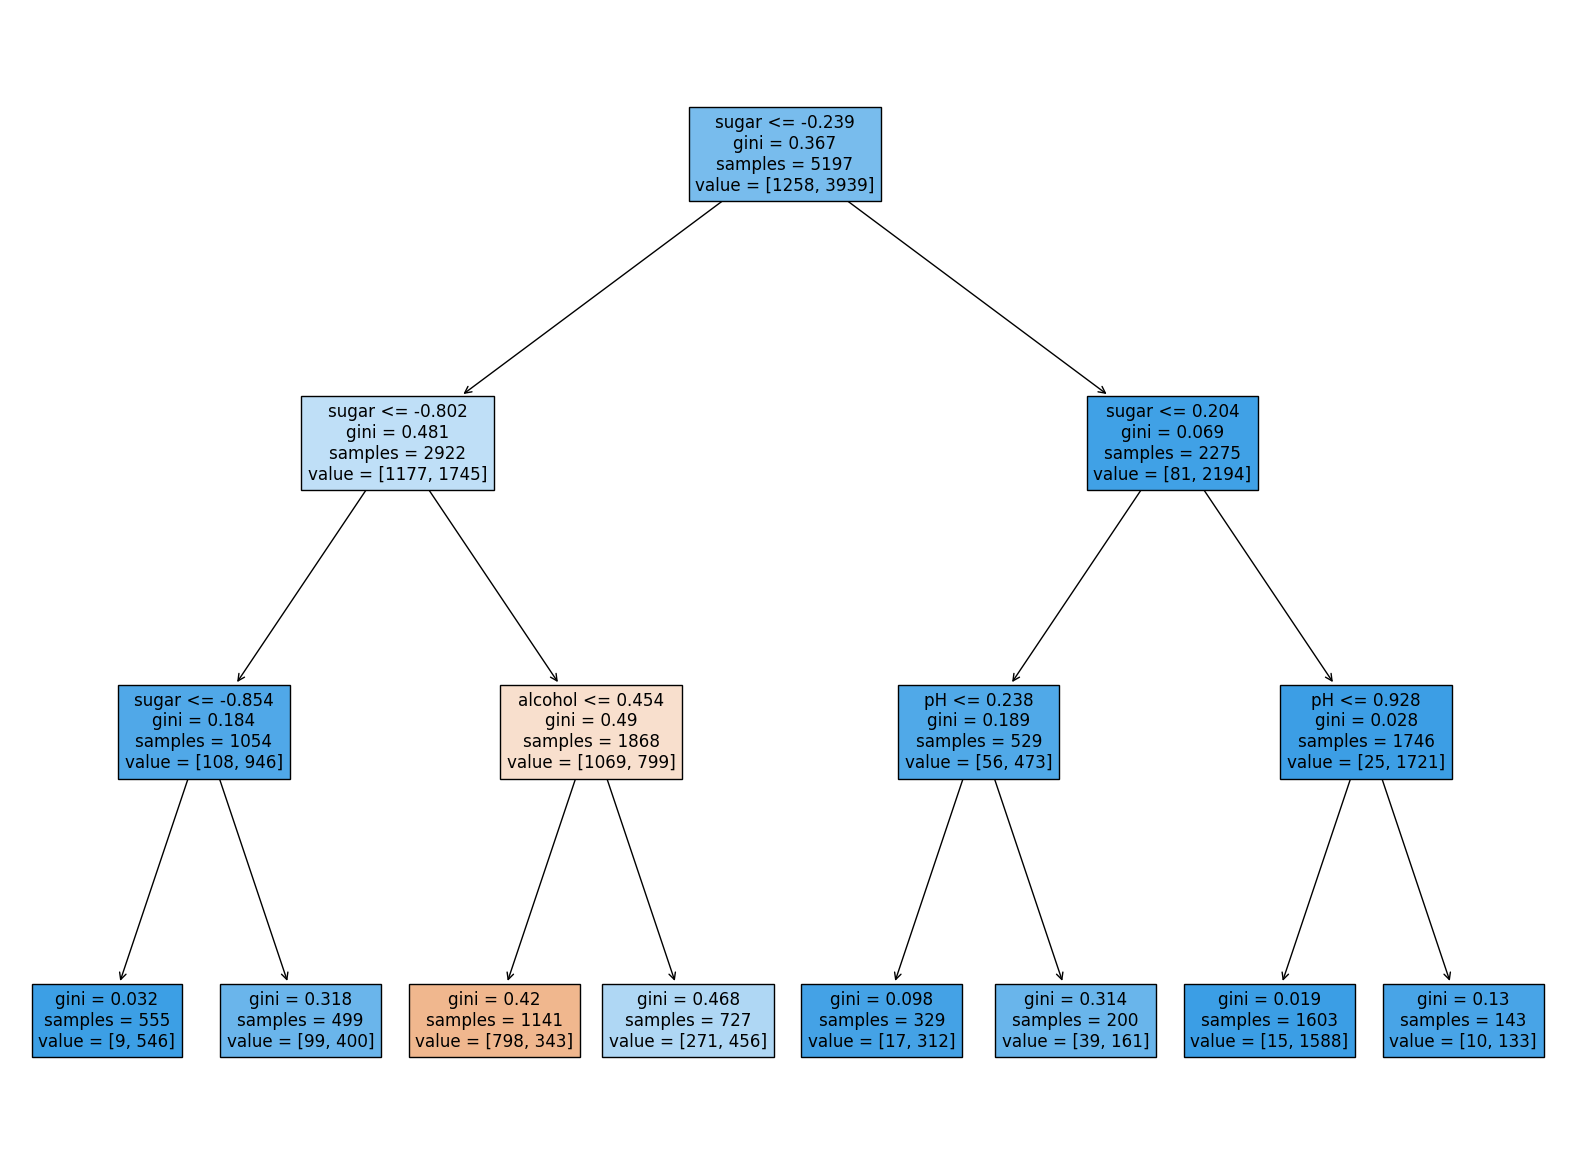

In [14]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [15]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
dt.score(train_input, train_target), dt.score(test_input, test_target)

(0.8454877814123533, 0.8415384615384616)

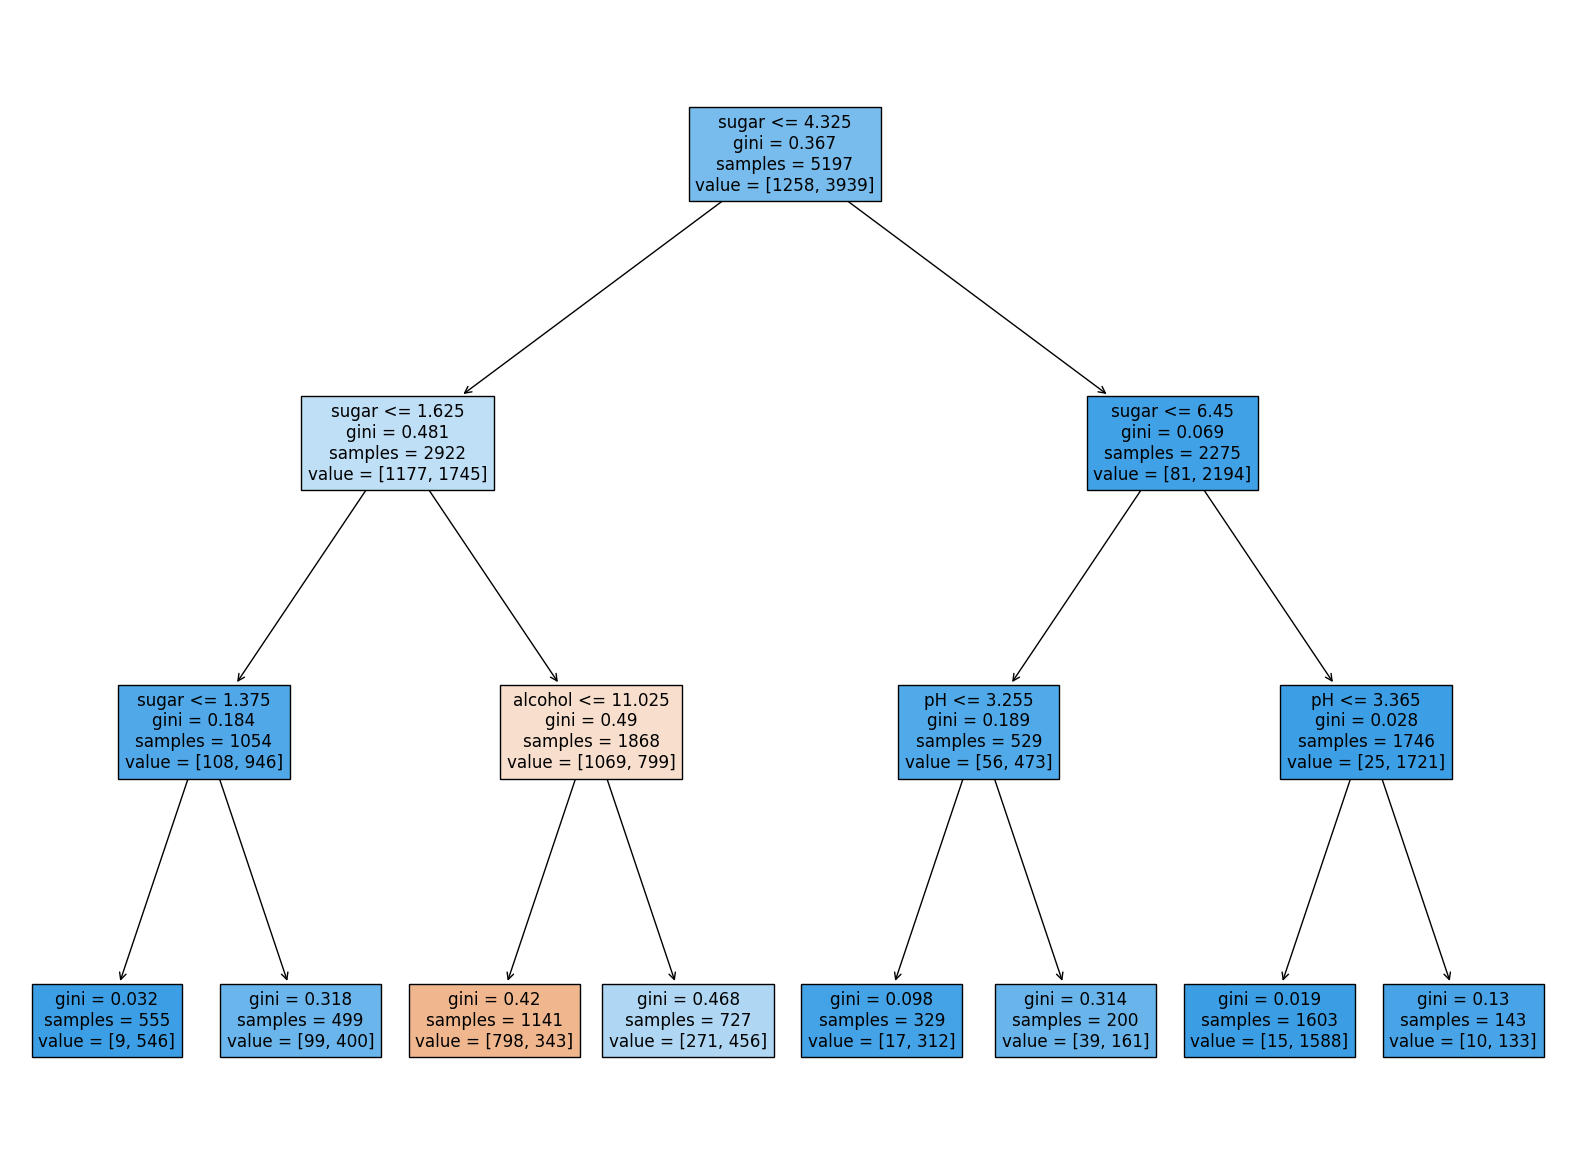

In [16]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [17]:
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

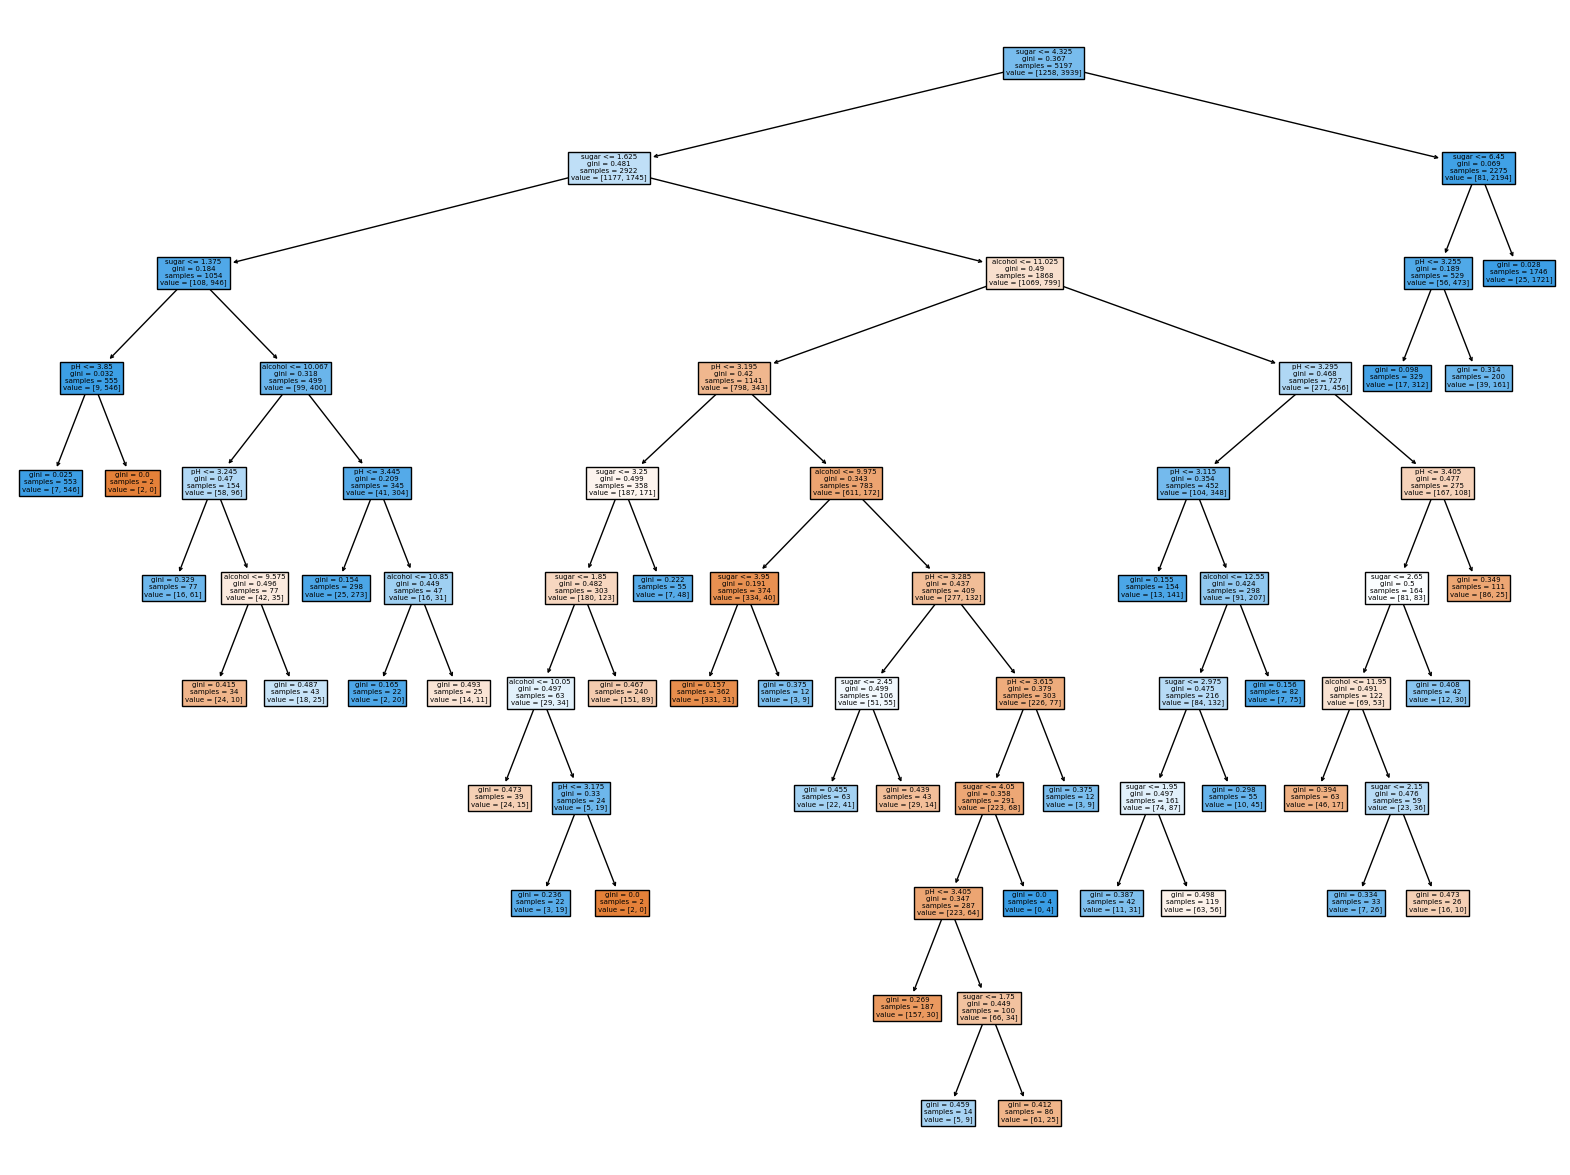

In [18]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
dt.score(train_input, train_target), dt.score(test_input, test_target)
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [19]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [20]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [21]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [22]:
sub_input.shape, val_input.shape

((4157, 3), (1040, 3))

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
dt.score(sub_input, sub_target), dt.score(val_input, val_target)

(0.9971133028626413, 0.864423076923077)

In [24]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
scores

{'fit_time': array([0.00611019, 0.00615692, 0.00669694, 0.0062151 , 0.00635314]),
 'score_time': array([0.00053883, 0.00058818, 0.00058699, 0.00043106, 0.00057602]),
 'test_score': array([0.87019231, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

In [25]:
import numpy as np

np.mean(scores['test_score'])

0.8554925223957948

In [26]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
np.mean(scores['test_score'])

0.8554925223957948

In [27]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
np.mean(scores['test_score'])

0.8581873425226026

In [28]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [29]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [30]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [31]:
dt = gs.best_estimator_
dt.score(train_input, train_target)

0.9615162593804117

In [32]:
gs.best_params_

{'min_impurity_decrease': 0.0001}

In [33]:
gs.cv_results_['mean_test_score']

array([0.86800067, 0.86453617, 0.86492226, 0.86780891, 0.86761605])

In [34]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
gs.cv_results_['params'][best_index]

{'min_impurity_decrease': 0.0001}

In [35]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [36]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [37]:
gs.best_params_

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}

In [38]:
np.max(gs.cv_results_['mean_test_score'])

0.8683865773302731

In [39]:
from scipy.stats import uniform, randint

rgen = randint(0, 10)
rgen.rvs(10)

array([3, 0, 0, 1, 2, 7, 5, 0, 6, 2])

In [40]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 94,  79,  95, 107,  82, 120, 100, 104, 104, 115]))

In [41]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.95945232, 0.72052562, 0.74351417, 0.9320563 , 0.18707853,
       0.06793644, 0.63078613, 0.88400766, 0.18234696, 0.93987036])

In [42]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [43]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x144ff4ad0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x145359bd0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x144ff7d10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x144ff4950>},
                   random_state=42)

In [44]:
gs.best_params_

{'max_depth': 39,
 'min_impurity_decrease': 0.00034102546602601173,
 'min_samples_leaf': 7,
 'min_samples_split': 13}

In [45]:
np.max(gs.cv_results_['mean_test_score'])

0.8695428296438884

In [46]:
dt = gs.best_estimator_
dt.score(test_input, test_target)

0.86

In [47]:
gs = RandomizedSearchCV(DecisionTreeClassifier(splitter='random', random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x144ff4ad0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x145359bd0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x144ff7d10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x144ff4950>},
                   random_state=42)

In [48]:
gs.best_params_, np.max(gs.cv_results_['mean_test_score'])

({'max_depth': 43,
  'min_impurity_decrease': 0.00011407982271508446,
  'min_samples_leaf': 19,
  'min_samples_split': 18},
 0.8458726956392981)

In [49]:
dt = gs.best_estimator_
dt.score(test_input, test_target)

0.786923076923077

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [51]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.9973541965122431, 0.8903229806766861)

In [52]:
rf.fit(train_input, train_target)
rf.feature_importances_

array([0.23183515, 0.50059756, 0.26756729])

In [53]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
rf.oob_score_

0.8945545507023283

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.9974503966084433, 0.8887848893166506)

In [55]:
et.fit(train_input, train_target)
et.feature_importances_

array([0.20183568, 0.52242907, 0.27573525])

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.8881086892152563, 0.8720430147331015)

In [57]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.9464595437171814, 0.8780082549788999)

In [58]:
gb.fit(train_input, train_target)
gb.feature_importances_

array([0.15872278, 0.68010884, 0.16116839])

In [59]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)
np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.9321723946453317, 0.8801241948619236)

In [60]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
result.importances_mean

array([0.08876275, 0.23438522, 0.08027708])

In [61]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
result.importances_mean

array([0.05969231, 0.20238462, 0.049     ])

In [62]:
hgb.score(test_input, test_target)

0.8723076923076923

In [63]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
np.mean(scores['train_score']), np.mean(scores['test_score'])

(0.9558403027491312, 0.8782000074035686)

In [66]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
np.mean(scores['train_score']), np.mean(scores['test_score'])

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGSEGV(-11)}